# Détection d'objets pour la génération de titre

Objectif : Dans le but de générer un titre pour le tableau créé, on souhaite détecter une liste des objets présents, qui serviront de "mots clés" pour générer un titre. 

In [2]:
!pip install translate

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from translate import Translator
import matplotlib.pyplot as plt
import cv2

data_dir = "/content/drive/Shareddrives/PFE artists/data/wikiart/base/"
img1 = data_dir+"Baroque/guido-reni_four-seasons-1620.jpg"
img2 = data_dir+"Symbolism/james-tissot_moses-and-joshua-in-the-tabernacle.jpg"
img3 = data_dir+"Fauvism/jean-hugo_nature-morte-aux-l-gumes-1965.jpg"

In [ ]:
# chargement du modèle VGG-16
model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
model.summary()

49152/35363 [=========================================] - 0s 0us/step
doormat (22.90%)
book_jacket (14.14%)
chest (7.74%)


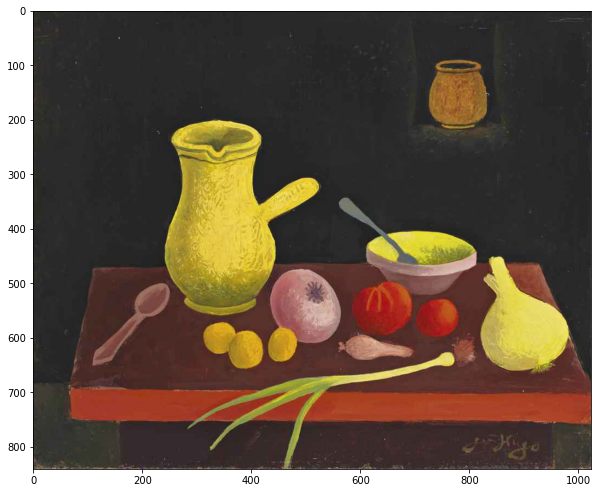

In [5]:
img = plt.imread(img3)
plt.figure(figsize=(10,10))
plt.imshow(img)

img = cv2.resize(img, (224,224)).astype("float32")
img_batch = preprocess_input(img[np.newaxis]) 

predictions = model.predict(img_batch)
labels = decode_predictions(predictions)

print('%s (%.2f%%)' % (labels[0][0][1], labels[0][0][2]*100))
print('%s (%.2f%%)' % (labels[0][1][1], labels[0][1][2]*100))
print('%s (%.2f%%)' % (labels[0][2][1], labels[0][2][2]*100))

In [14]:
# fonction effectuant l'analyse
def detect(img_path):
  img = plt.imread(img_path)
  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.show()

  img = cv2.resize(img, (224,224)).astype("float32")
  img_batch = preprocess_input(img[np.newaxis]) 

  predictions = model.predict(img_batch)
  labels = decode_predictions(predictions)

  translator= Translator(from_lang="english",to_lang="french")
  keywords = [translator.translate(l[1].replace("_", " ")) for l in labels[0][:3]]
  probas = [l[2] for l in labels[0][:3]]

  return keywords, probas

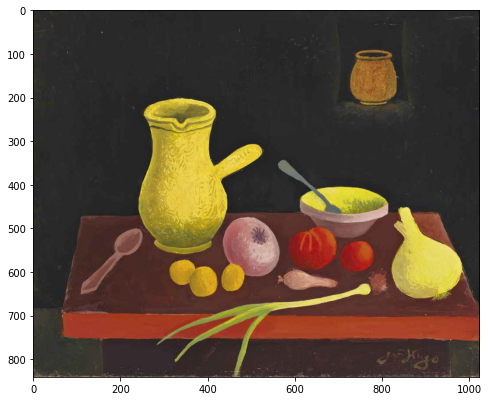

['paillasson', 'VESTE', 'poitrine', 'Balle de tennis', 'nounours'] [0.22897767, 0.14144018, 0.077395834, 0.056639824, 0.046126198]


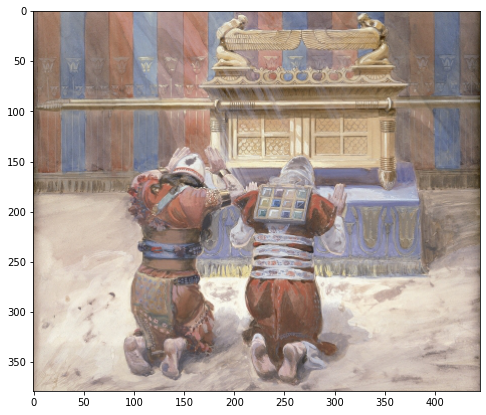

['trône', 'prison', 'Charrette à cheval', 'Stupa', 'Monastère'] [0.38067073, 0.10872161, 0.06829172, 0.046391487, 0.046097547]


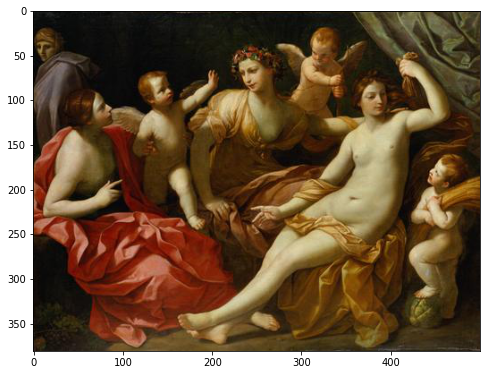

['fontaine', 'autel', 'piédestal', 'le basket-ball', 'the church.'] [0.47370476, 0.1699502, 0.12200531, 0.09865415, 0.024635656]


In [16]:
k, p = detect(img3)
print(k, p)
k, p = detect(img2)
print(k, p)
k, p = detect(img1)
print(k, p)